# Wine

In [1]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense    

Using TensorFlow backend.


## data check

In [4]:
import pandas as pd

df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # 원본 데이터의 100% 추출
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.99620,3.44,0.58,10.7,5,1
5061,6.8,0.170,0.34,2.0,0.040,38.0,111.0,0.99000,3.24,0.45,12.9,6,0
1455,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6,1
4672,6.7,0.240,0.41,2.9,0.039,48.0,122.0,0.99052,3.25,0.43,12.0,5,0
4804,6.8,0.450,0.36,5.0,0.033,28.0,156.0,0.99100,3.11,0.40,12.4,7,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 67 to 4886
Data columns (total 13 columns):
0     6497 non-null float64
1     6497 non-null float64
2     6497 non-null float64
3     6497 non-null float64
4     6497 non-null float64
5     6497 non-null float64
6     6497 non-null float64
7     6497 non-null float64
8     6497 non-null float64
9     6497 non-null float64
10    6497 non-null float64
11    6497 non-null int64
12    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

## deep learning

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=200)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
6497/6497 [==============================] - 0s 31us/step - loss: 0.3897 - acc: 0.8007
Epoch 2/200
6497/6497 [==============================] - 0s 6us/step - loss: 0.2746 - acc: 0.9006
Epoch 3/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.2215 - acc: 0.9320
Epoch 4/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.2040 - acc: 0.9355
Epoch 5/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1947 - acc: 0.9375
Epoch 6/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1864 - acc: 0.9381
Epoch 7/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1839 - acc: 0.9401
Epoch 8/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1769 - acc: 0.9407
Epoch 9/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1744 - acc: 0.9404
Epoch 10/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.1681 - acc: 0.9426
Epoch 11/200
6497/

6497/6497 [==============================] - 0s 4us/step - loss: 0.0471 - acc: 0.9868
Epoch 166/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0538 - acc: 0.9840
Epoch 167/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0484 - acc: 0.9869
Epoch 168/200
6497/6497 [==============================] - 0s 3us/step - loss: 0.0448 - acc: 0.9874
Epoch 169/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0473 - acc: 0.9871
Epoch 170/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0541 - acc: 0.9848
Epoch 171/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0489 - acc: 0.9860
Epoch 172/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0445 - acc: 0.9874
Epoch 173/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0500 - acc: 0.9866
Epoch 174/200
6497/6497 [==============================] - 0s 4us/step - loss: 0.0477 - acc: 0.9869
Epoch 175/200


## model update

In [11]:
import os

# 모델 저장 폴더 지정
MODEL_DIR = 'wine_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = "wine_model/{epoch:02d}-{val_loss:.4f}.hdf5"
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.04415, saving model to wine_model/01-0.0442.hdf5

Epoch 00002: val_loss improved from 0.04415 to 0.04377, saving model to wine_model/02-0.0438.hdf5

Epoch 00003: val_loss did not improve from 0.04377

Epoch 00004: val_loss did not improve from 0.04377

Epoch 00005: val_loss improved from 0.04377 to 0.04253, saving model to wine_model/05-0.0425.hdf5

Epoch 00006: val_loss did not improve from 0.04253

Epoch 00007: val_loss did not improve from 0.04253

Epoch 00008: val_loss improved from 0.04253 to 0.04205, saving model to wine_model/08-0.0420.hdf5

Epoch 00009: val_loss did not improve from 0.04205

Epoch 00010: val_loss did not improve from 0.04205

Epoch 00011: val_loss did not improve from 0.04205

Epoch 00012: val_loss did not improve from 0.04205

Epoch 00013: val_loss did not improve from 0.04205

Epoch 00014: val_loss did not improve from 0.04205

Epoch 00015: val_loss did not improve from 0.04205

Epoch 00016: val_loss did not impro


Epoch 00160: val_loss did not improve from 0.04106

Epoch 00161: val_loss did not improve from 0.04106

Epoch 00162: val_loss did not improve from 0.04106

Epoch 00163: val_loss did not improve from 0.04106

Epoch 00164: val_loss improved from 0.04106 to 0.04097, saving model to wine_model/164-0.0410.hdf5

Epoch 00165: val_loss did not improve from 0.04097

Epoch 00166: val_loss did not improve from 0.04097

Epoch 00167: val_loss improved from 0.04097 to 0.03997, saving model to wine_model/167-0.0400.hdf5

Epoch 00168: val_loss did not improve from 0.03997

Epoch 00169: val_loss did not improve from 0.03997

Epoch 00170: val_loss did not improve from 0.03997

Epoch 00171: val_loss did not improve from 0.03997

Epoch 00172: val_loss did not improve from 0.03997

Epoch 00173: val_loss improved from 0.03997 to 0.03989, saving model to wine_model/173-0.0399.hdf5

Epoch 00174: val_loss did not improve from 0.03989

Epoch 00175: val_loss did not improve from 0.03989

Epoch 00176: val_loss d

## checking result with graph

In [16]:
df = df_pre.sample(frac=0.15) # 15% 추출
history = model.fit(X, Y, validation_split=0.3, epochs=3000, batch_size=500)

Train on 4547 samples, validate on 1950 samples
Epoch 1/3000
4547/4547 [==============================] - 0s 4us/step - loss: 0.0135 - acc: 0.9974 - val_loss: 0.0530 - val_acc: 0.9918
Epoch 2/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0124 - acc: 0.9976 - val_loss: 0.0504 - val_acc: 0.9923
Epoch 3/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0155 - acc: 0.9965 - val_loss: 0.0665 - val_acc: 0.9882
Epoch 4/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0292 - acc: 0.9921 - val_loss: 0.0577 - val_acc: 0.9923
Epoch 5/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0190 - acc: 0.9963 - val_loss: 0.0530 - val_acc: 0.9918
Epoch 6/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0169 - acc: 0.9960 - val_loss: 0.0508 - val_acc: 0.9928
Epoch 7/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0189 - acc: 0.9952 - val_loss: 0.0534 - val_acc: 0.9918


4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9978 - val_loss: 0.0499 - val_acc: 0.9933
Epoch 120/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0122 - acc: 0.9974 - val_loss: 0.0539 - val_acc: 0.9918
Epoch 121/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0137 - acc: 0.9969 - val_loss: 0.0584 - val_acc: 0.9913
Epoch 122/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0136 - acc: 0.9969 - val_loss: 0.0478 - val_acc: 0.9923
Epoch 123/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0122 - acc: 0.9978 - val_loss: 0.0475 - val_acc: 0.9938
Epoch 124/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0125 - acc: 0.9976 - val_loss: 0.0616 - val_acc: 0.9908
Epoch 125/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0129 - acc: 0.9974 - val_loss: 0.0519 - val_acc: 0.9928
Epoch 126/3000
4547/4547 [=======================

Epoch 237/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0117 - acc: 0.9980 - val_loss: 0.0479 - val_acc: 0.9949
Epoch 238/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0119 - acc: 0.9976 - val_loss: 0.0518 - val_acc: 0.9928
Epoch 239/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0148 - acc: 0.9963 - val_loss: 0.0524 - val_acc: 0.9923
Epoch 240/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0121 - acc: 0.9980 - val_loss: 0.0488 - val_acc: 0.9933
Epoch 241/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0135 - acc: 0.9974 - val_loss: 0.0469 - val_acc: 0.9944
Epoch 242/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0123 - acc: 0.9978 - val_loss: 0.0507 - val_acc: 0.9944
Epoch 243/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9980 - val_loss: 0.0509 - val_acc: 0.9944
Epoch 244/3000
4547/4547 [========

4547/4547 [==============================] - 0s 3us/step - loss: 0.0198 - acc: 0.9943 - val_loss: 0.0512 - val_acc: 0.9933
Epoch 356/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0179 - acc: 0.9956 - val_loss: 0.0477 - val_acc: 0.9949
Epoch 357/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0133 - acc: 0.9976 - val_loss: 0.0518 - val_acc: 0.9933
Epoch 358/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0129 - acc: 0.9976 - val_loss: 0.0596 - val_acc: 0.9908
Epoch 359/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0151 - acc: 0.9967 - val_loss: 0.0533 - val_acc: 0.9923
Epoch 360/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0148 - acc: 0.9967 - val_loss: 0.0510 - val_acc: 0.9933
Epoch 361/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0125 - acc: 0.9976 - val_loss: 0.0496 - val_acc: 0.9933
Epoch 362/3000
4547/4547 [=======================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0147 - acc: 0.9971 - val_loss: 0.0554 - val_acc: 0.9928
Epoch 474/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0126 - acc: 0.9969 - val_loss: 0.0561 - val_acc: 0.9933
Epoch 475/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.0574 - val_acc: 0.9923
Epoch 476/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0117 - acc: 0.9978 - val_loss: 0.0525 - val_acc: 0.9923
Epoch 477/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0113 - acc: 0.9980 - val_loss: 0.0491 - val_acc: 0.9944
Epoch 478/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0124 - acc: 0.9974 - val_loss: 0.0505 - val_acc: 0.9923
Epoch 479/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0127 - acc: 0.9976 - val_loss: 0.0564 - val_acc: 0.9908
Epoch 480/3000
4547/4547 [=======================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0140 - acc: 0.9974 - val_loss: 0.0794 - val_acc: 0.9882
Epoch 592/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0278 - acc: 0.9927 - val_loss: 0.0742 - val_acc: 0.9897
Epoch 593/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0189 - acc: 0.9954 - val_loss: 0.0612 - val_acc: 0.9918
Epoch 594/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0305 - acc: 0.9919 - val_loss: 0.0635 - val_acc: 0.9903
Epoch 595/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0186 - acc: 0.9965 - val_loss: 0.0594 - val_acc: 0.9928
Epoch 596/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0138 - acc: 0.9974 - val_loss: 0.0602 - val_acc: 0.9923
Epoch 597/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0126 - acc: 0.9978 - val_loss: 0.0645 - val_acc: 0.9913
Epoch 598/3000
4547/4547 [=======================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0116 - acc: 0.9980 - val_loss: 0.0484 - val_acc: 0.9933
Epoch 710/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0114 - acc: 0.9980 - val_loss: 0.0513 - val_acc: 0.9928
Epoch 711/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0117 - acc: 0.9980 - val_loss: 0.0486 - val_acc: 0.9933
Epoch 712/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0119 - acc: 0.9980 - val_loss: 0.0519 - val_acc: 0.9923
Epoch 713/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0119 - acc: 0.9980 - val_loss: 0.0516 - val_acc: 0.9928
Epoch 714/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0116 - acc: 0.9978 - val_loss: 0.0475 - val_acc: 0.9933
Epoch 715/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0115 - acc: 0.9982 - val_loss: 0.0568 - val_acc: 0.9923
Epoch 716/3000
4547/4547 [=======================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9980 - val_loss: 0.0542 - val_acc: 0.9923
Epoch 828/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0535 - val_acc: 0.9923
Epoch 829/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0115 - acc: 0.9978 - val_loss: 0.0547 - val_acc: 0.9923
Epoch 830/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9982 - val_loss: 0.0588 - val_acc: 0.9928
Epoch 831/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0134 - acc: 0.9974 - val_loss: 0.0556 - val_acc: 0.9928
Epoch 832/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0119 - acc: 0.9978 - val_loss: 0.0577 - val_acc: 0.9923
Epoch 833/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.0559 - val_acc: 0.9928
Epoch 834/3000
4547/4547 [=======================

Epoch 886/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0116 - acc: 0.9976 - val_loss: 0.0537 - val_acc: 0.9933
Epoch 887/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9980 - val_loss: 0.0550 - val_acc: 0.9933
Epoch 888/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0531 - val_acc: 0.9928
Epoch 889/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0113 - acc: 0.9982 - val_loss: 0.0577 - val_acc: 0.9923
Epoch 890/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0572 - val_acc: 0.9923
Epoch 891/3000
4547/4547 [==============================] - ETA: 0s - loss: 0.0154 - acc: 0.996 - 0s 3us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.0574 - val_acc: 0.9923
Epoch 892/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0566 - val_acc: 0.9

4547/4547 [==============================] - 0s 3us/step - loss: 0.0124 - acc: 0.9978 - val_loss: 0.0526 - val_acc: 0.9923
Epoch 946/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0114 - acc: 0.9980 - val_loss: 0.0539 - val_acc: 0.9928
Epoch 947/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0115 - acc: 0.9978 - val_loss: 0.0537 - val_acc: 0.9928
Epoch 948/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9978 - val_loss: 0.0540 - val_acc: 0.9918
Epoch 949/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0573 - val_acc: 0.9923
Epoch 950/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0581 - val_acc: 0.9918
Epoch 951/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0560 - val_acc: 0.9923
Epoch 952/3000
4547/4547 [=======================

Epoch 1063/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0612 - val_acc: 0.9913
Epoch 1064/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0152 - acc: 0.9958 - val_loss: 0.0558 - val_acc: 0.9897
Epoch 1065/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0479 - val_acc: 0.9913
Epoch 1066/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0142 - acc: 0.9963 - val_loss: 0.0508 - val_acc: 0.9928
Epoch 1067/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0124 - acc: 0.9974 - val_loss: 0.0525 - val_acc: 0.9928
Epoch 1068/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0125 - acc: 0.9969 - val_loss: 0.0468 - val_acc: 0.9944
Epoch 1069/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0245 - acc: 0.9932 - val_loss: 0.0457 - val_acc: 0.9938
Epoch 1070/3000
4547/4547 [

Epoch 1122/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0109 - acc: 0.9982 - val_loss: 0.0509 - val_acc: 0.9933
Epoch 1123/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0119 - acc: 0.9978 - val_loss: 0.0536 - val_acc: 0.9933
Epoch 1124/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9978 - val_loss: 0.0484 - val_acc: 0.9933
Epoch 1125/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0161 - acc: 0.9963 - val_loss: 0.0532 - val_acc: 0.9923
Epoch 1126/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0143 - acc: 0.9967 - val_loss: 0.0619 - val_acc: 0.9913
Epoch 1127/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0139 - acc: 0.9967 - val_loss: 0.0683 - val_acc: 0.9903
Epoch 1128/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0123 - acc: 0.9976 - val_loss: 0.0617 - val_acc: 0.9913
Epoch 1129/3000
4547/4547 [

Epoch 1181/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0529 - val_acc: 0.9928
Epoch 1182/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0611 - val_acc: 0.9903
Epoch 1183/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9976 - val_loss: 0.0585 - val_acc: 0.9913
Epoch 1184/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0250 - acc: 0.9945 - val_loss: 0.0789 - val_acc: 0.9882
Epoch 1185/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0530 - acc: 0.9870 - val_loss: 0.0712 - val_acc: 0.9897
Epoch 1186/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0210 - acc: 0.9949 - val_loss: 0.0545 - val_acc: 0.9918
Epoch 1187/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0164 - acc: 0.9954 - val_loss: 0.0480 - val_acc: 0.9928
Epoch 1188/3000
4547/4547 [

Epoch 1240/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0106 - acc: 0.9976 - val_loss: 0.0594 - val_acc: 0.9918
Epoch 1241/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0591 - val_acc: 0.9923
Epoch 1242/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0550 - val_acc: 0.9918
Epoch 1243/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9982 - val_loss: 0.0525 - val_acc: 0.9928
Epoch 1244/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0545 - val_acc: 0.9933
Epoch 1245/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9982 - val_loss: 0.0562 - val_acc: 0.9918
Epoch 1246/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0104 - acc: 0.9980 - val_loss: 0.0560 - val_acc: 0.9923
Epoch 1247/3000
4547/4547 [

Epoch 1299/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0140 - acc: 0.9971 - val_loss: 0.0521 - val_acc: 0.9923
Epoch 1300/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0116 - acc: 0.9982 - val_loss: 0.0545 - val_acc: 0.9923
Epoch 1301/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0106 - acc: 0.9987 - val_loss: 0.0576 - val_acc: 0.9908
Epoch 1302/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0537 - val_acc: 0.9938
Epoch 1303/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0559 - val_acc: 0.9923
Epoch 1304/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0587 - val_acc: 0.9918
Epoch 1305/3000
4547/4547 [==============================] - ETA: 0s - loss: 0.0030 - acc: 1.000 - 0s 3us/step - loss: 0.0112 - acc: 0.9982 - val_loss: 0.0559 - val_a

4547/4547 [==============================] - 0s 3us/step - loss: 0.0116 - acc: 0.9978 - val_loss: 0.0508 - val_acc: 0.9928
Epoch 1416/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0470 - val_acc: 0.9944
Epoch 1417/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0124 - acc: 0.9980 - val_loss: 0.0542 - val_acc: 0.9913
Epoch 1418/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0112 - acc: 0.9985 - val_loss: 0.0460 - val_acc: 0.9944
Epoch 1419/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0584 - val_acc: 0.9903
Epoch 1420/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0212 - acc: 0.9943 - val_loss: 0.0756 - val_acc: 0.9887
Epoch 1421/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0609 - acc: 0.9846 - val_loss: 0.0725 - val_acc: 0.9897
Epoch 1422/3000
4547/4547 [================

4547/4547 [==============================] - 0s 2us/step - loss: 0.0112 - acc: 0.9980 - val_loss: 0.0454 - val_acc: 0.9938
Epoch 1475/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0115 - acc: 0.9976 - val_loss: 0.0476 - val_acc: 0.9938
Epoch 1476/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0114 - acc: 0.9978 - val_loss: 0.0495 - val_acc: 0.9928
Epoch 1477/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0121 - acc: 0.9976 - val_loss: 0.0452 - val_acc: 0.9938
Epoch 1478/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0483 - val_acc: 0.9933
Epoch 1479/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0526 - val_acc: 0.9933
Epoch 1480/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0115 - acc: 0.9980 - val_loss: 0.0466 - val_acc: 0.9938
Epoch 1481/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9982 - val_loss: 0.0474 - val_acc: 0.9928
Epoch 1534/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0483 - val_acc: 0.9928
Epoch 1535/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0104 - acc: 0.9982 - val_loss: 0.0510 - val_acc: 0.9923
Epoch 1536/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0104 - acc: 0.9985 - val_loss: 0.0490 - val_acc: 0.9933
Epoch 1537/3000
4547/4547 [==============================] - ETA: 0s - loss: 0.0017 - acc: 1.000 - 0s 3us/step - loss: 0.0106 - acc: 0.9985 - val_loss: 0.0535 - val_acc: 0.9918
Epoch 1538/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0498 - val_acc: 0.9933
Epoch 1539/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9985 - val_loss: 0.0544 - val_acc: 0.9928
Epoch

Epoch 1592/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0543 - val_acc: 0.9933
Epoch 1593/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0103 - acc: 0.9987 - val_loss: 0.0568 - val_acc: 0.9918
Epoch 1594/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0101 - acc: 0.9985 - val_loss: 0.0527 - val_acc: 0.9923
Epoch 1595/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0117 - acc: 0.9976 - val_loss: 0.0545 - val_acc: 0.9923
Epoch 1596/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9985 - val_loss: 0.0542 - val_acc: 0.9923
Epoch 1597/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0557 - val_acc: 0.9928
Epoch 1598/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0109 - acc: 0.9982 - val_loss: 0.0532 - val_acc: 0.9928
Epoch 1599/3000
4547/4547 [

Epoch 1651/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0111 - acc: 0.9980 - val_loss: 0.0456 - val_acc: 0.9938
Epoch 1652/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0129 - acc: 0.9976 - val_loss: 0.0601 - val_acc: 0.9897
Epoch 1653/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0220 - acc: 0.9941 - val_loss: 0.0515 - val_acc: 0.9908
Epoch 1654/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0232 - acc: 0.9949 - val_loss: 0.0526 - val_acc: 0.9918
Epoch 1655/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0159 - acc: 0.9952 - val_loss: 0.0596 - val_acc: 0.9892
Epoch 1656/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0136 - acc: 0.9974 - val_loss: 0.0420 - val_acc: 0.9954
Epoch 1657/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0115 - acc: 0.9976 - val_loss: 0.0501 - val_acc: 0.9913
Epoch 1658/3000
4547/4547 [

Epoch 1710/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0186 - acc: 0.9954 - val_loss: 0.0551 - val_acc: 0.9918
Epoch 1711/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0441 - acc: 0.9888 - val_loss: 0.0466 - val_acc: 0.9938
Epoch 1712/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0219 - acc: 0.9947 - val_loss: 0.0627 - val_acc: 0.9897
Epoch 1713/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0271 - acc: 0.9921 - val_loss: 0.0470 - val_acc: 0.9933
Epoch 1714/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0278 - acc: 0.9919 - val_loss: 0.0742 - val_acc: 0.9887
Epoch 1715/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0225 - acc: 0.9947 - val_loss: 0.0462 - val_acc: 0.9933
Epoch 1716/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0126 - acc: 0.9976 - val_loss: 0.0545 - val_acc: 0.9923
Epoch 1717/3000
4547/4547 [

4547/4547 [==============================] - 0s 2us/step - loss: 0.0102 - acc: 0.9985 - val_loss: 0.0510 - val_acc: 0.9933
Epoch 1828/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0106 - acc: 0.9982 - val_loss: 0.0543 - val_acc: 0.9923
Epoch 1829/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0101 - acc: 0.9982 - val_loss: 0.0515 - val_acc: 0.9938
Epoch 1830/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0135 - acc: 0.9965 - val_loss: 0.0592 - val_acc: 0.9897
Epoch 1831/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0110 - acc: 0.9987 - val_loss: 0.0518 - val_acc: 0.9933
Epoch 1832/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0114 - acc: 0.9982 - val_loss: 0.0511 - val_acc: 0.9944
Epoch 1833/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0120 - acc: 0.9978 - val_loss: 0.0571 - val_acc: 0.9918
Epoch 1834/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9980 - val_loss: 0.0540 - val_acc: 0.9923
Epoch 1887/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0643 - val_acc: 0.9897
Epoch 1888/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0125 - acc: 0.9974 - val_loss: 0.0619 - val_acc: 0.9903
Epoch 1889/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0136 - acc: 0.9978 - val_loss: 0.0555 - val_acc: 0.9913
Epoch 1890/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9978 - val_loss: 0.0525 - val_acc: 0.9918
Epoch 1891/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9978 - val_loss: 0.0548 - val_acc: 0.9928
Epoch 1892/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0128 - acc: 0.9978 - val_loss: 0.0495 - val_acc: 0.9944
Epoch 1893/3000
4547/4547 [================

Epoch 1945/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0805 - acc: 0.9848 - val_loss: 0.0639 - val_acc: 0.9903
Epoch 1946/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0426 - acc: 0.9901 - val_loss: 0.0768 - val_acc: 0.9867
Epoch 1947/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0266 - acc: 0.9930 - val_loss: 0.0687 - val_acc: 0.9903
Epoch 1948/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0201 - acc: 0.9952 - val_loss: 0.0543 - val_acc: 0.9918
Epoch 1949/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0197 - acc: 0.9952 - val_loss: 0.0581 - val_acc: 0.9913
Epoch 1950/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0166 - acc: 0.9965 - val_loss: 0.0728 - val_acc: 0.9882
Epoch 1951/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0166 - acc: 0.9963 - val_loss: 0.0566 - val_acc: 0.9923
Epoch 1952/3000
4547/4547 [

Epoch 2004/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9980 - val_loss: 0.0546 - val_acc: 0.9923
Epoch 2005/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9982 - val_loss: 0.0557 - val_acc: 0.9928
Epoch 2006/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0102 - acc: 0.9985 - val_loss: 0.0603 - val_acc: 0.9923
Epoch 2007/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0554 - val_acc: 0.9928
Epoch 2008/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9985 - val_loss: 0.0518 - val_acc: 0.9923
Epoch 2009/3000
4547/4547 [==============================] - ETA: 0s - loss: 0.0190 - acc: 0.994 - 0s 3us/step - loss: 0.0099 - acc: 0.9985 - val_loss: 0.0534 - val_acc: 0.9928
Epoch 2010/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9982 - val_loss: 0.0559 - val_a

4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9985 - val_loss: 0.0480 - val_acc: 0.9933
Epoch 2122/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0101 - acc: 0.9985 - val_loss: 0.0482 - val_acc: 0.9938
Epoch 2123/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9987 - val_loss: 0.0505 - val_acc: 0.9923
Epoch 2124/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0114 - acc: 0.9978 - val_loss: 0.0519 - val_acc: 0.9928
Epoch 2125/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0128 - acc: 0.9974 - val_loss: 0.0524 - val_acc: 0.9913
Epoch 2126/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9982 - val_loss: 0.0467 - val_acc: 0.9933
Epoch 2127/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9980 - val_loss: 0.0478 - val_acc: 0.9933
Epoch 2128/3000
4547/4547 [================

Epoch 2180/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0117 - acc: 0.9980 - val_loss: 0.0592 - val_acc: 0.9923
Epoch 2181/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0464 - val_acc: 0.9944
Epoch 2182/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0115 - acc: 0.9976 - val_loss: 0.0628 - val_acc: 0.9908
Epoch 2183/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0503 - val_acc: 0.9933
Epoch 2184/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0108 - acc: 0.9985 - val_loss: 0.0533 - val_acc: 0.9928
Epoch 2185/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0119 - acc: 0.9976 - val_loss: 0.0495 - val_acc: 0.9928
Epoch 2186/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0107 - acc: 0.9976 - val_loss: 0.0509 - val_acc: 0.9933
Epoch 2187/3000
4547/4547 [

Epoch 2297/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0516 - val_acc: 0.9933
Epoch 2298/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0104 - acc: 0.9980 - val_loss: 0.0544 - val_acc: 0.9923
Epoch 2299/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9985 - val_loss: 0.0518 - val_acc: 0.9933
Epoch 2300/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9978 - val_loss: 0.0538 - val_acc: 0.9928
Epoch 2301/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0120 - acc: 0.9971 - val_loss: 0.0642 - val_acc: 0.9897
Epoch 2302/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0118 - acc: 0.9974 - val_loss: 0.0510 - val_acc: 0.9938
Epoch 2303/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9980 - val_loss: 0.0597 - val_acc: 0.9913
Epoch 2304/3000
4547/4547 [

4547/4547 [==============================] - 0s 3us/step - loss: 0.0110 - acc: 0.9976 - val_loss: 0.0462 - val_acc: 0.9944
Epoch 2415/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0480 - val_acc: 0.9938
Epoch 2416/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0103 - acc: 0.9982 - val_loss: 0.0464 - val_acc: 0.9944
Epoch 2417/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0104 - acc: 0.9985 - val_loss: 0.0437 - val_acc: 0.9944
Epoch 2418/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9982 - val_loss: 0.0456 - val_acc: 0.9944
Epoch 2419/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0103 - acc: 0.9985 - val_loss: 0.0471 - val_acc: 0.9938
Epoch 2420/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0103 - acc: 0.9980 - val_loss: 0.0442 - val_acc: 0.9944
Epoch 2421/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0101 - acc: 0.9982 - val_loss: 0.0464 - val_acc: 0.9944
Epoch 2474/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0098 - acc: 0.9982 - val_loss: 0.0528 - val_acc: 0.9938
Epoch 2475/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9978 - val_loss: 0.0510 - val_acc: 0.9933
Epoch 2476/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0104 - acc: 0.9987 - val_loss: 0.0494 - val_acc: 0.9938
Epoch 2477/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0105 - acc: 0.9982 - val_loss: 0.0489 - val_acc: 0.9928
Epoch 2478/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0100 - acc: 0.9980 - val_loss: 0.0539 - val_acc: 0.9923
Epoch 2479/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0577 - val_acc: 0.9918
Epoch 2480/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0509 - val_acc: 0.9933
Epoch 2533/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0096 - acc: 0.9982 - val_loss: 0.0510 - val_acc: 0.9933
Epoch 2534/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0097 - acc: 0.9980 - val_loss: 0.0501 - val_acc: 0.9928
Epoch 2535/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0099 - acc: 0.9985 - val_loss: 0.0509 - val_acc: 0.9928
Epoch 2536/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9987 - val_loss: 0.0521 - val_acc: 0.9928
Epoch 2537/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0097 - acc: 0.9985 - val_loss: 0.0528 - val_acc: 0.9933
Epoch 2538/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0526 - val_acc: 0.9923
Epoch 2539/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0562 - val_acc: 0.9923
Epoch 2592/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0092 - acc: 0.9987 - val_loss: 0.0553 - val_acc: 0.9933
Epoch 2593/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0094 - acc: 0.9985 - val_loss: 0.0564 - val_acc: 0.9923
Epoch 2594/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0561 - val_acc: 0.9938
Epoch 2595/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0127 - acc: 0.9965 - val_loss: 0.0614 - val_acc: 0.9928
Epoch 2596/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.0549 - val_acc: 0.9923
Epoch 2597/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0099 - acc: 0.9985 - val_loss: 0.0556 - val_acc: 0.9933
Epoch 2598/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0095 - acc: 0.9985 - val_loss: 0.0532 - val_acc: 0.9923
Epoch 2651/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0244 - acc: 0.9938 - val_loss: 0.0982 - val_acc: 0.9846
Epoch 2652/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0264 - acc: 0.9934 - val_loss: 0.1060 - val_acc: 0.9856
Epoch 2653/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0256 - acc: 0.9934 - val_loss: 0.1126 - val_acc: 0.9831
Epoch 2654/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0274 - acc: 0.9914 - val_loss: 0.1080 - val_acc: 0.9856
Epoch 2655/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0242 - acc: 0.9927 - val_loss: 0.0922 - val_acc: 0.9867
Epoch 2656/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0189 - acc: 0.9947 - val_loss: 0.0730 - val_acc: 0.9903
Epoch 2657/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0103 - acc: 0.9978 - val_loss: 0.0565 - val_acc: 0.9918
Epoch 2710/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0570 - val_acc: 0.9928
Epoch 2711/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0101 - acc: 0.9980 - val_loss: 0.0559 - val_acc: 0.9928
Epoch 2712/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9978 - val_loss: 0.0552 - val_acc: 0.9928
Epoch 2713/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9978 - val_loss: 0.0562 - val_acc: 0.9928
Epoch 2714/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9978 - val_loss: 0.0576 - val_acc: 0.9928
Epoch 2715/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.0641 - val_acc: 0.9903
Epoch 2716/3000
4547/4547 [================

4547/4547 [==============================] - 0s 3us/step - loss: 0.0093 - acc: 0.9987 - val_loss: 0.0487 - val_acc: 0.9933
Epoch 2827/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0096 - acc: 0.9985 - val_loss: 0.0495 - val_acc: 0.9933
Epoch 2828/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0102 - acc: 0.9987 - val_loss: 0.0554 - val_acc: 0.9928
Epoch 2829/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0104 - acc: 0.9982 - val_loss: 0.0577 - val_acc: 0.9938
Epoch 2830/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0126 - acc: 0.9971 - val_loss: 0.0628 - val_acc: 0.9913
Epoch 2831/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0134 - acc: 0.9965 - val_loss: 0.0628 - val_acc: 0.9903
Epoch 2832/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0112 - acc: 0.9974 - val_loss: 0.0709 - val_acc: 0.9892
Epoch 2833/3000
4547/4547 [================

Epoch 2885/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0091 - acc: 0.9987 - val_loss: 0.0597 - val_acc: 0.9918
Epoch 2886/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9980 - val_loss: 0.0570 - val_acc: 0.9933
Epoch 2887/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0111 - acc: 0.9982 - val_loss: 0.0594 - val_acc: 0.9913
Epoch 2888/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9980 - val_loss: 0.0570 - val_acc: 0.9928
Epoch 2889/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0095 - acc: 0.9982 - val_loss: 0.0600 - val_acc: 0.9918
Epoch 2890/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0094 - acc: 0.9978 - val_loss: 0.0580 - val_acc: 0.9923
Epoch 2891/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0091 - acc: 0.9987 - val_loss: 0.0557 - val_acc: 0.9933
Epoch 2892/3000
4547/4547 [

Epoch 2944/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0153 - acc: 0.9974 - val_loss: 0.0550 - val_acc: 0.9928
Epoch 2945/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0105 - acc: 0.9982 - val_loss: 0.0526 - val_acc: 0.9944
Epoch 2946/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0118 - acc: 0.9969 - val_loss: 0.0511 - val_acc: 0.9933
Epoch 2947/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0100 - acc: 0.9982 - val_loss: 0.0523 - val_acc: 0.9933
Epoch 2948/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0093 - acc: 0.9987 - val_loss: 0.0560 - val_acc: 0.9928
Epoch 2949/3000
4547/4547 [==============================] - 0s 2us/step - loss: 0.0099 - acc: 0.9987 - val_loss: 0.0543 - val_acc: 0.9938
Epoch 2950/3000
4547/4547 [==============================] - 0s 3us/step - loss: 0.0089 - acc: 0.9985 - val_loss: 0.0551 - val_acc: 0.9938
Epoch 2951/3000
4547/4547 [

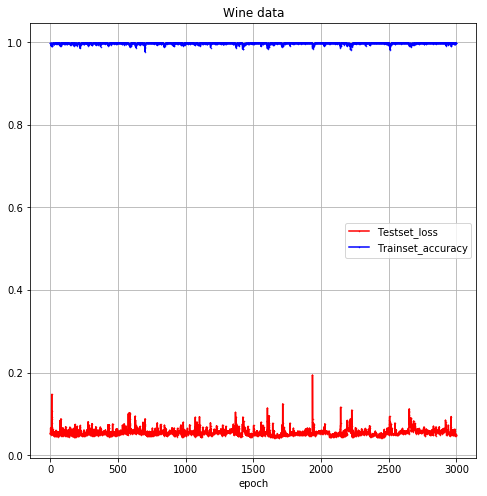

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))

plt.figure(figsize=(8,8))
plt.plot(x_len, y_vloss, marker='.', c='red', markersize=1, label='Testset_loss')
plt.plot(x_len, y_acc, marker='.', c='blue', markersize=1, label='Trainset_accuracy')
plt.grid()
plt.legend(loc='upper_right')
plt.xlabel('epoch')
plt.title('Wine data')
plt.show()

## Stopping learning

In [18]:
from keras.callbacks import EarlyStopping

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 5197 samples, validate on 1300 samples
Epoch 1/2000
5197/5197 [==============================] - 0s 7us/step - loss: 0.0109 - acc: 0.9979 - val_loss: 0.0695 - val_acc: 0.9931
Epoch 2/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0118 - acc: 0.9977 - val_loss: 0.0654 - val_acc: 0.9931
Epoch 3/2000
5197/5197 [==============================] - 0s 4us/step - loss: 0.0111 - acc: 0.9979 - val_loss: 0.0703 - val_acc: 0.9923
Epoch 4/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0113 - acc: 0.9971 - val_loss: 0.0729 - val_acc: 0.9915
Epoch 5/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0101 - acc: 0.9981 - val_loss: 0.0604 - val_acc: 0.9938
Epoch 6/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0098 - acc: 0.9981 - val_loss: 0.0595 - val_acc: 0.9938
Epoch 7/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0096 - acc: 0.9983 - val_loss: 0.0593 - val_acc: 0.9923


Epoch 120/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0129 - acc: 0.9967 - val_loss: 0.0644 - val_acc: 0.9900
Epoch 121/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0108 - acc: 0.9973 - val_loss: 0.0650 - val_acc: 0.9931
Epoch 122/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9975 - val_loss: 0.0618 - val_acc: 0.9946
Epoch 123/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0094 - acc: 0.9983 - val_loss: 0.0615 - val_acc: 0.9931
Epoch 124/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0095 - acc: 0.9981 - val_loss: 0.0661 - val_acc: 0.9923
Epoch 125/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0092 - acc: 0.9981 - val_loss: 0.0611 - val_acc: 0.9931
Epoch 126/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0085 - acc: 0.9985 - val_loss: 0.0594 - val_acc: 0.9946
Epoch 127/2000
5197/5197 [========

5197/5197 [==============================] - 0s 2us/step - loss: 0.0150 - acc: 0.9965 - val_loss: 0.0636 - val_acc: 0.9931
Epoch 180/2000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0127 - acc: 0.9967 - val_loss: 0.0621 - val_acc: 0.9931
Epoch 181/2000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0123 - acc: 0.9979 - val_loss: 0.0634 - val_acc: 0.9923
Epoch 182/2000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0110 - acc: 0.9973 - val_loss: 0.0618 - val_acc: 0.9931
Epoch 183/2000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0099 - acc: 0.9981 - val_loss: 0.0583 - val_acc: 0.9931
Epoch 184/2000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0099 - acc: 0.9981 - val_loss: 0.0614 - val_acc: 0.9938
Epoch 185/2000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0095 - acc: 0.9979 - val_loss: 0.0596 - val_acc: 0.9946
Epoch 186/2000
5197/5197 [=======================

## Summary

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = 'wine_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "wine_model/{epoch:02d}-{val_loss:.4f}.hdf5"
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=4000, batch_size=500, callbacks=[early_stopping_callback, checkpointer])

Train on 5197 samples, validate on 1300 samples
Epoch 1/4000
5197/5197 [==============================] - 0s 52us/step - loss: 0.4785 - acc: 0.7502 - val_loss: 0.3819 - val_acc: 0.7800

Epoch 00001: val_loss improved from inf to 0.38195, saving model to wine_model/01-0.3819.hdf5
Epoch 2/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.3803 - acc: 0.7883 - val_loss: 0.3299 - val_acc: 0.8415

Epoch 00002: val_loss improved from 0.38195 to 0.32986, saving model to wine_model/02-0.3299.hdf5
Epoch 3/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.3389 - acc: 0.8432 - val_loss: 0.2952 - val_acc: 0.8785

Epoch 00003: val_loss improved from 0.32986 to 0.29520, saving model to wine_model/03-0.2952.hdf5
Epoch 4/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.3067 - acc: 0.8788 - val_loss: 0.2678 - val_acc: 0.9062

Epoch 00004: val_loss improved from 0.29520 to 0.26776, saving model to wine_model/04-0.2678.hdf5
Epoch 5/4000
51

Epoch 37/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.1409 - acc: 0.9502 - val_loss: 0.1349 - val_acc: 0.9446

Epoch 00037: val_loss improved from 0.13710 to 0.13494, saving model to wine_model/37-0.1349.hdf5
Epoch 38/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.1378 - acc: 0.9505 - val_loss: 0.1333 - val_acc: 0.9446

Epoch 00038: val_loss improved from 0.13494 to 0.13329, saving model to wine_model/38-0.1333.hdf5
Epoch 39/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.1352 - acc: 0.9521 - val_loss: 0.1318 - val_acc: 0.9485

Epoch 00039: val_loss improved from 0.13329 to 0.13185, saving model to wine_model/39-0.1318.hdf5
Epoch 40/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.1348 - acc: 0.9519 - val_loss: 0.1305 - val_acc: 0.9485

Epoch 00040: val_loss improved from 0.13185 to 0.13053, saving model to wine_model/40-0.1305.hdf5
Epoch 41/4000
5197/5197 [==============================]


Epoch 00074: val_loss improved from 0.09373 to 0.09281, saving model to wine_model/74-0.0928.hdf5
Epoch 75/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0984 - acc: 0.9675 - val_loss: 0.0923 - val_acc: 0.9631

Epoch 00075: val_loss improved from 0.09281 to 0.09232, saving model to wine_model/75-0.0923.hdf5
Epoch 76/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0975 - acc: 0.9686 - val_loss: 0.1013 - val_acc: 0.9669

Epoch 00076: val_loss did not improve from 0.09232
Epoch 77/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0989 - acc: 0.9684 - val_loss: 0.0891 - val_acc: 0.9669

Epoch 00077: val_loss improved from 0.09232 to 0.08906, saving model to wine_model/77-0.0891.hdf5
Epoch 78/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0945 - acc: 0.9702 - val_loss: 0.1010 - val_acc: 0.9669

Epoch 00078: val_loss did not improve from 0.08906
Epoch 79/4000
5197/5197 [==========================

Epoch 113/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0728 - acc: 0.9786 - val_loss: 0.0666 - val_acc: 0.9792

Epoch 00113: val_loss did not improve from 0.06547
Epoch 114/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0663 - val_acc: 0.9762

Epoch 00114: val_loss did not improve from 0.06547
Epoch 115/4000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0718 - acc: 0.9792 - val_loss: 0.0695 - val_acc: 0.9800

Epoch 00115: val_loss did not improve from 0.06547
Epoch 116/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0725 - acc: 0.9786 - val_loss: 0.0660 - val_acc: 0.9777

Epoch 00116: val_loss did not improve from 0.06547
Epoch 117/4000
5197/5197 [==============================] - ETA: 0s - loss: 0.0823 - acc: 0.972 - 0s 3us/step - loss: 0.0721 - acc: 0.9786 - val_loss: 0.0645 - val_acc: 0.9800

Epoch 00117: val_loss improved from 0.06547 to 0.06453, saving 

Epoch 194/4000
5197/5197 [==============================] - ETA: 0s - loss: 0.0635 - acc: 0.982 - 0s 3us/step - loss: 0.0509 - acc: 0.9869 - val_loss: 0.0520 - val_acc: 0.9854

Epoch 00194: val_loss did not improve from 0.05020
Epoch 195/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0507 - acc: 0.9856 - val_loss: 0.0510 - val_acc: 0.9877

Epoch 00195: val_loss did not improve from 0.05020
Epoch 196/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0528 - acc: 0.9856 - val_loss: 0.0564 - val_acc: 0.9869

Epoch 00196: val_loss did not improve from 0.05020
Epoch 197/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0520 - acc: 0.9860 - val_loss: 0.0496 - val_acc: 0.9869

Epoch 00197: val_loss improved from 0.05020 to 0.04962, saving model to wine_model/197-0.0496.hdf5
Epoch 198/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0512 - acc: 0.9873 - val_loss: 0.0581 - val_acc: 0.9838

Epoch 00198: va

5197/5197 [==============================] - 0s 3us/step - loss: 0.0475 - acc: 0.9877 - val_loss: 0.0502 - val_acc: 0.9869

Epoch 00236: val_loss did not improve from 0.04821
Epoch 237/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0461 - acc: 0.9873 - val_loss: 0.0499 - val_acc: 0.9869

Epoch 00237: val_loss did not improve from 0.04821
Epoch 238/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0468 - acc: 0.9877 - val_loss: 0.0503 - val_acc: 0.9862

Epoch 00238: val_loss did not improve from 0.04821
Epoch 239/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0462 - acc: 0.9873 - val_loss: 0.0486 - val_acc: 0.9862

Epoch 00239: val_loss did not improve from 0.04821
Epoch 240/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0511 - acc: 0.9852 - val_loss: 0.0556 - val_acc: 0.9854

Epoch 00240: val_loss did not improve from 0.04821
Epoch 241/4000
5197/5197 [==============================] - 0s 2u

5197/5197 [==============================] - 0s 2us/step - loss: 0.0463 - acc: 0.9871 - val_loss: 0.0498 - val_acc: 0.9869

Epoch 00278: val_loss did not improve from 0.04618
Epoch 279/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0490 - acc: 0.9867 - val_loss: 0.0629 - val_acc: 0.9808

Epoch 00279: val_loss did not improve from 0.04618
Epoch 280/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0463 - acc: 0.9873 - val_loss: 0.0478 - val_acc: 0.9877

Epoch 00280: val_loss did not improve from 0.04618
Epoch 281/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0436 - acc: 0.9885 - val_loss: 0.0472 - val_acc: 0.9869

Epoch 00281: val_loss did not improve from 0.04618
Epoch 282/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0432 - acc: 0.9890 - val_loss: 0.0476 - val_acc: 0.9885

Epoch 00282: val_loss did not improve from 0.04618
Epoch 283/4000
5197/5197 [==============================] - 0s 3u

5197/5197 [==============================] - 0s 2us/step - loss: 0.0451 - acc: 0.9871 - val_loss: 0.0591 - val_acc: 0.9815

Epoch 00321: val_loss did not improve from 0.04565
Epoch 322/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0482 - acc: 0.9867 - val_loss: 0.0482 - val_acc: 0.9869

Epoch 00322: val_loss did not improve from 0.04565
Epoch 323/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0422 - acc: 0.9883 - val_loss: 0.0484 - val_acc: 0.9892

Epoch 00323: val_loss did not improve from 0.04565
Epoch 324/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0425 - acc: 0.9896 - val_loss: 0.0460 - val_acc: 0.9892

Epoch 00324: val_loss did not improve from 0.04565
Epoch 325/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0419 - acc: 0.9898 - val_loss: 0.0460 - val_acc: 0.9892

Epoch 00325: val_loss did not improve from 0.04565
Epoch 326/4000
5197/5197 [==============================] - 0s 3u


Epoch 00363: val_loss did not improve from 0.04485
Epoch 364/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0427 - acc: 0.9894 - val_loss: 0.0508 - val_acc: 0.9885

Epoch 00364: val_loss did not improve from 0.04485
Epoch 365/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0437 - acc: 0.9875 - val_loss: 0.0476 - val_acc: 0.9885

Epoch 00365: val_loss did not improve from 0.04485
Epoch 366/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0426 - acc: 0.9890 - val_loss: 0.0466 - val_acc: 0.9877

Epoch 00366: val_loss did not improve from 0.04485
Epoch 367/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0419 - acc: 0.9888 - val_loss: 0.0454 - val_acc: 0.9892

Epoch 00367: val_loss did not improve from 0.04485
Epoch 368/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0418 - acc: 0.9900 - val_loss: 0.0454 - val_acc: 0.9892

Epoch 00368: val_loss did not improve from 0.0448

5197/5197 [==============================] - 0s 3us/step - loss: 0.0443 - acc: 0.9883 - val_loss: 0.0446 - val_acc: 0.9908

Epoch 00449: val_loss did not improve from 0.04304
Epoch 450/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0401 - acc: 0.9885 - val_loss: 0.0500 - val_acc: 0.9885

Epoch 00450: val_loss did not improve from 0.04304
Epoch 451/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0436 - acc: 0.9877 - val_loss: 0.0476 - val_acc: 0.9892

Epoch 00451: val_loss did not improve from 0.04304
Epoch 452/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0401 - acc: 0.9902 - val_loss: 0.0474 - val_acc: 0.9900

Epoch 00452: val_loss did not improve from 0.04304
Epoch 453/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0383 - acc: 0.9898 - val_loss: 0.0504 - val_acc: 0.9869

Epoch 00453: val_loss did not improve from 0.04304
Epoch 454/4000
5197/5197 [==============================] - 0s 3u

5197/5197 [==============================] - 0s 3us/step - loss: 0.0409 - acc: 0.9888 - val_loss: 0.0458 - val_acc: 0.9892

Epoch 00535: val_loss did not improve from 0.04232
Epoch 536/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0364 - acc: 0.9906 - val_loss: 0.0444 - val_acc: 0.9900

Epoch 00536: val_loss did not improve from 0.04232
Epoch 537/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0460 - val_acc: 0.9900

Epoch 00537: val_loss did not improve from 0.04232
Epoch 538/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0355 - acc: 0.9910 - val_loss: 0.0443 - val_acc: 0.9900

Epoch 00538: val_loss did not improve from 0.04232
Epoch 539/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0358 - acc: 0.9906 - val_loss: 0.0458 - val_acc: 0.9900

Epoch 00539: val_loss did not improve from 0.04232
Epoch 540/4000
5197/5197 [==============================] - 0s 3u

5197/5197 [==============================] - 0s 2us/step - loss: 0.0372 - acc: 0.9902 - val_loss: 0.0434 - val_acc: 0.9908

Epoch 00578: val_loss did not improve from 0.04232
Epoch 579/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0349 - acc: 0.9906 - val_loss: 0.0442 - val_acc: 0.9885

Epoch 00579: val_loss did not improve from 0.04232
Epoch 580/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0351 - acc: 0.9913 - val_loss: 0.0469 - val_acc: 0.9900

Epoch 00580: val_loss did not improve from 0.04232
Epoch 581/4000
5197/5197 [==============================] - 0s 2us/step - loss: 0.0363 - acc: 0.9910 - val_loss: 0.0433 - val_acc: 0.9900

Epoch 00581: val_loss did not improve from 0.04232
Epoch 582/4000
5197/5197 [==============================] - 0s 3us/step - loss: 0.0354 - acc: 0.9908 - val_loss: 0.0440 - val_acc: 0.9885

Epoch 00582: val_loss did not improve from 0.04232
Epoch 583/4000
5197/5197 [==============================] - 0s 2u